In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


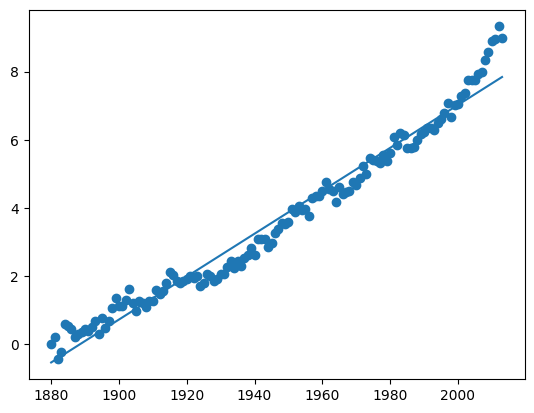

In [10]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x, y, label='Sea Level Data')

slope, intercept, rvalue, pvalue, stderr= linregress(x,y)

plt.plot(x,slope*x+intercept)

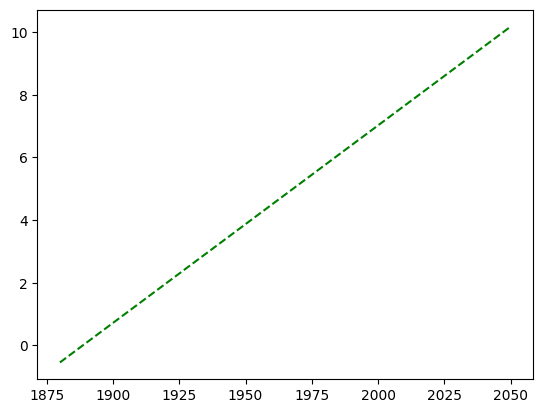

In [11]:
future_years_all = range(1880, 2051)
future_sea_levels_all = intercept + slope * future_years_all
plt.plot(future_years_all, future_sea_levels_all, 'g--', label='Predicted Sea Level Rise in 2050 (All Data)')

In [15]:
recent_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])

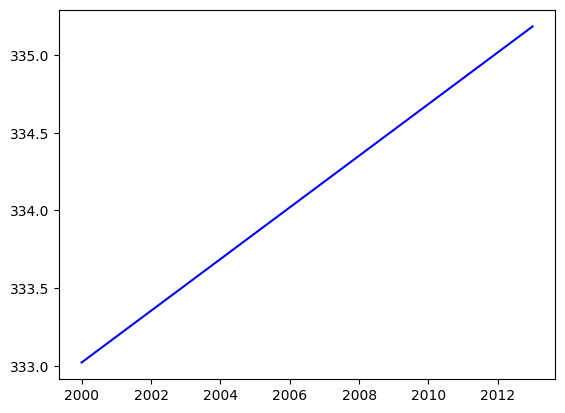

In [16]:
plt.plot(recent_data['Year'], slope_recent + slope_recent * recent_data['Year'], 'b', label='Line of Best Fit (2000 Onwards)')

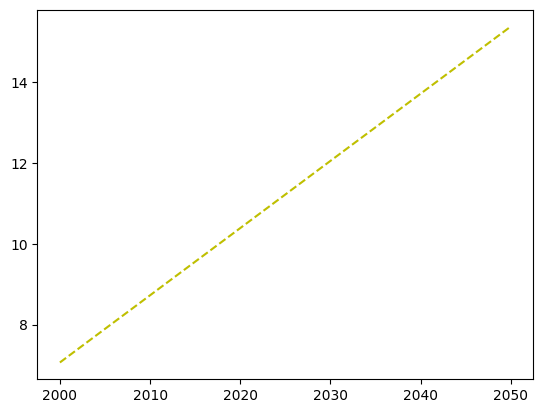

In [17]:
future_years_recent = range(2000, 2051)
future_sea_levels_recent = intercept_recent + slope_recent * future_years_recent
plt.plot(future_years_recent, future_sea_levels_recent, 'y--', label='Predicted Sea Level Rise in 2050 (2000 Onwards)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


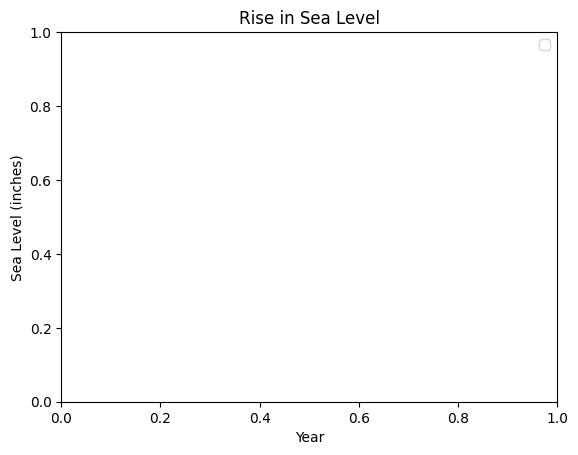

In [18]:
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

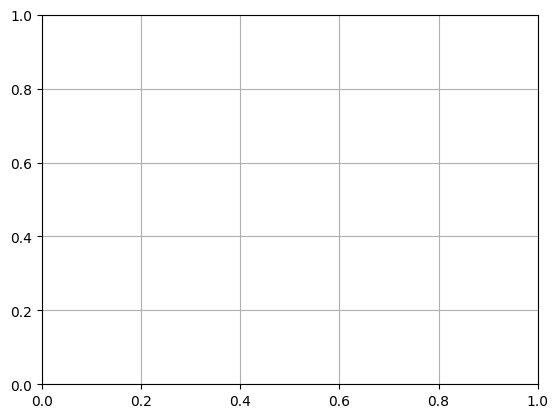

In [19]:
plt.grid(True)
plt.show()